# Look at Markov States

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
%matplotlib inline

In [7]:
states = ['A', 'B', 'C', 'Exit']

# Transitions
A = np.zeros((len(states), len(states)))  # Rows are prior states, col next state
A[0, 0] = 0.7
A[0, 1] = 0.3
A[1, 1] = 0.8
A[1, 2] = 0.1
A[1, 3] = 0.1
A[2, 2] = 0.9
A[2, 3] = 0.1
A[3, 3] = 1
print(A)

# Costs
C = np.zeros(A.shape)
C[0, 0] = 1
C[0, 1] = 2
C[1, 2] = 3
C[2, 3] = 4
print(C)

[[ 0.7  0.3  0.   0. ]
 [ 0.   0.8  0.1  0.1]
 [ 0.   0.   0.9  0.1]
 [ 0.   0.   0.   1. ]]
[[ 1.  2.  0.  0.]
 [ 0.  0.  3.  0.]
 [ 0.  0.  0.  4.]
 [ 0.  0.  0.  0.]]


[ 0.24  0.51  0.12  0.14]
[ 0.23  0.52  0.11  0.13]


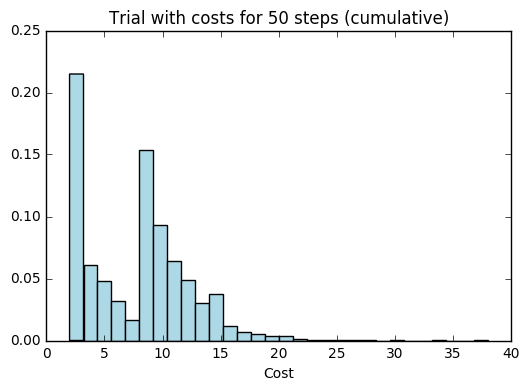

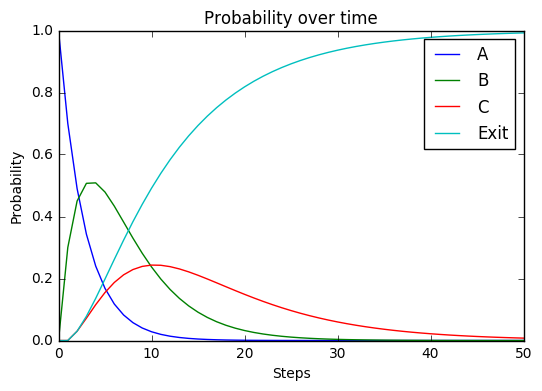

In [108]:
# Basic class to handle all this

class Graph():
    def __init__(self, state_names, edges, costs):
        self.state_names = state_names
        self.edges = edges
        self.costs = costs
        
    def step_probability(self, states, n_steps=1):
        for _ in range(n_steps):
            states = np.dot(states, self.edges)
        return states
    
    def step_probabilities(self, states, n_steps=1):
        intermediate_states = [states]
        for _ in range(n_steps):
            states = np.dot(states, self.edges)
            intermediate_states.append(states)
        return np.array(intermediate_states)
    
    def step_rand(self, states, n_steps=1):        
        for _ in range(n_steps):
            states = self.next_state(states)
        return states
    
    def step_cost(self, states, n_steps=1):        
        # Costs are incured at transitions
        tot_cost = 0
        for _ in range(n_steps):
            states, cost = self.next_cost(states)
            tot_cost += cost
        return tot_cost
    
    def step_costs(self, states, n_steps=1):        
        # Costs are incured at transitions
        costs = []
        for _ in range(n_steps):
            states, cost = self.next_cost(states)
            costs.append(cost)
        return np.array(costs)
    
    def next_state(self, states):
        # Pick transition state at random based on probabilities
        transition_prob = np.dot(states, self.edges)
        pick = np.random.random()
        cum = np.cumsum(transition_prob)
        new_state = np.argwhere(cum - pick > 0)[0]

        # Move to next state
        new_states = np.zeros(states.shape)
        new_states[new_state] = 1
        return new_states
    
    def next_cost(self, states):
        from_cost = states.dot(self.costs)
        states = self.next_state(states)
        cost = from_cost.dot(states.T)
        return states, cost
        

grph = Graph(states, A, C)
init_states = np.array([1., 0, 0, 0])
print(grph.step_probability(init_states, 4))

# Run a randomized trial
trial_prob = np.zeros(len(states))
for _ in range(10000):
    trial_prob += grph.step_rand(init_states, 4)
print(trial_prob / 10000)

# Costs trial
costs = []
for _ in range(10000):
    costs.append(grph.step_cost(init_states, 50))
plt.hist(costs, bins=30, normed=True, color='LightBlue');
plt.title('Trial with costs for 50 steps (cumulative)')
plt.xlabel('Cost')

# Prob of all steps
plt.figure()
plt.plot(grph.step_probabilities(init_states, 50));
plt.legend(grph.state_names)
plt.xlabel('Steps')
plt.ylabel('Probability')
plt.title('Probability over time');